<a href="https://colab.research.google.com/github/Kanisorn001/DataWareHouse/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สอน 1 เมษา 2564

In [ ]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/dataviz_2024_DATA'

In [ ]:
data = pd.read_csv(os.path.join(path,'/content/barchart_data.csv'))
data.head()

,Unnamed: 0,Year,Quarter,Region,Brand,Price Category,Sales
0,0,2021,Q1,North America,BrandA,Budget,8270
1,1,2021,Q1,North America,BrandA,Mid-range,1860
2,2,2021,Q1,North America,BrandA,Premium,6390
3,3,2021,Q1,North America,BrandB,Budget,6191
4,4,2021,Q1,North America,BrandB,Mid-range,6734


In [ ]:
# prompt: ใน column Price Category เปลี่ยน Budget เป็น รุ่นประหยัด Mid-range เป็น รุ่นเริ่มต้น Premium เป็น รุ่นเรือธง

data['Price Category'] = data['Price Category'].replace({'Budget': 'รุ่นประหยัด', 'Mid-range': 'รุ่นเริ่มต้น', 'Premium': 'รุ่นเรือธง'})
data

,Unnamed: 0,Year,Quarter,Region,Brand,Price Category,Sales
0,0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734
...,...,...,...,...,...,...,...
475,475,2022,Q4,Africa,BrandC,รุ่นเริ่มต้น,6486
476,476,2022,Q4,Africa,BrandC,รุ่นเรือธง,9335
477,477,2022,Q4,Africa,BrandD,รุ่นประหยัด,5980
478,478,2022,Q4,Africa,BrandD,รุ่นเริ่มต้น,8266


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อค้นหาร้านอาหาร ในแต่ละวัน

quiz 6

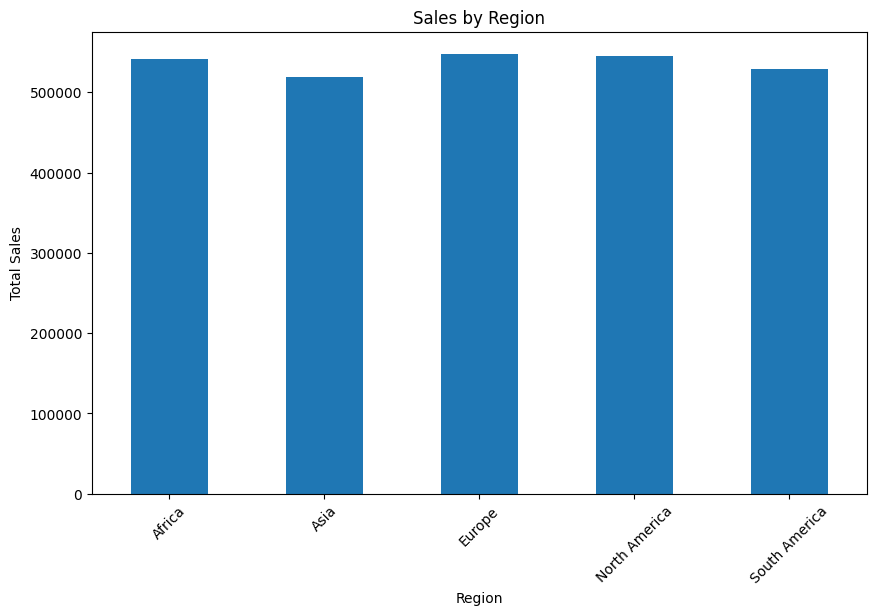

In [ ]:
# prompt: สร้าง Barchat เปรียบเทียบปริมาณ sales กับ Region

import matplotlib.pyplot as plt

# Group data by Region and sum the sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
region_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [ ]:
region_sales.reset_index()['Region']

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [ ]:
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

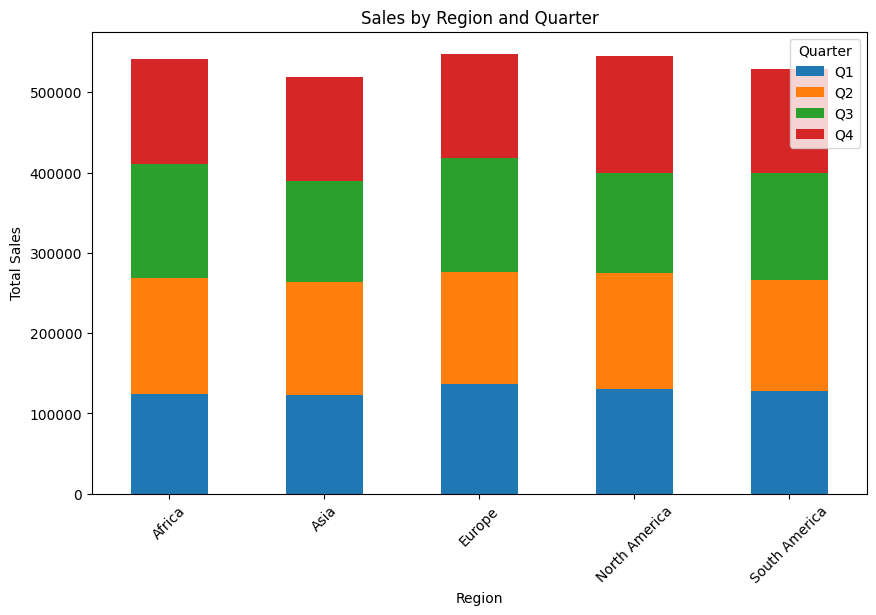

In [ ]:
# prompt: สร้าง Barchat เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ Quarter ของแต่ละ Region ด้วย stacked barchart

# Group data by Region and Quarter, then sum the sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Quarter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Quarter')
plt.show()


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

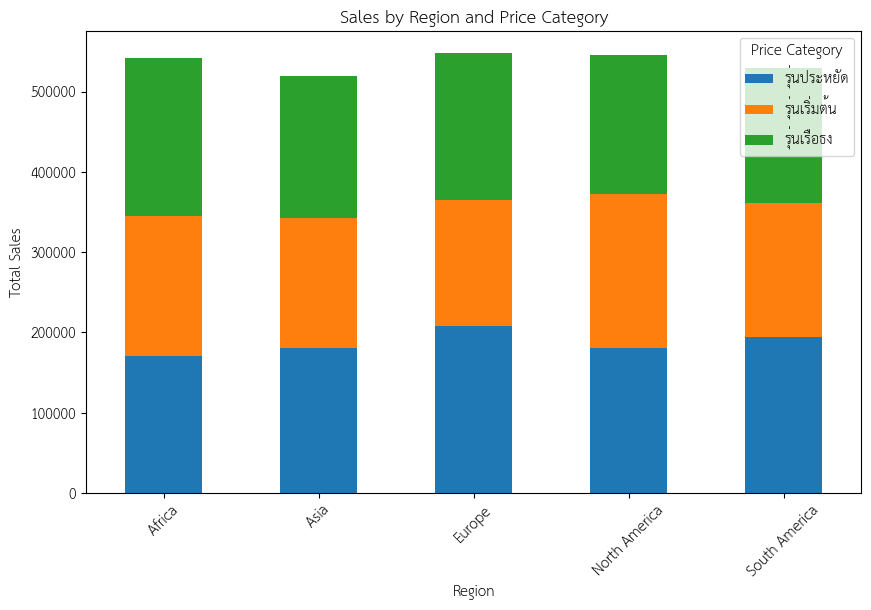

In [ ]:
# prompt: สร้าง Barchat เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ Price Category ของแต่ละ Region ด้วย stacked barchart

# Group data by Region and Price Category, then sum the sales
region_price_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Price Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Price Category')
plt.show()


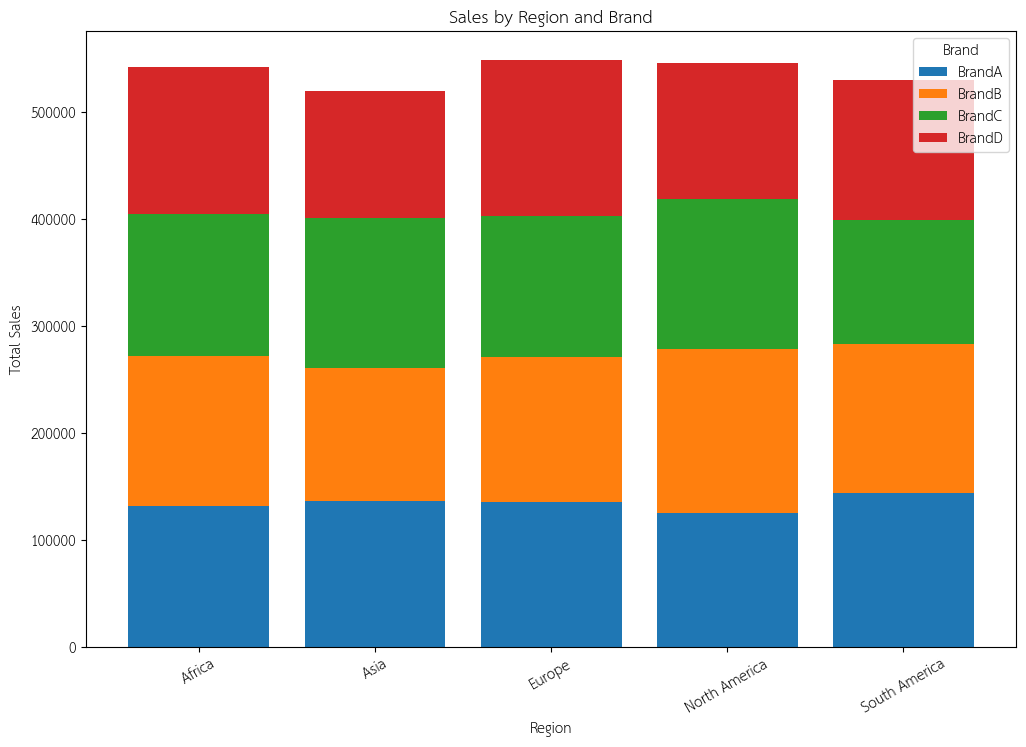

In [ ]:
# prompt: สร้าง Barchat เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ Brand ของแต่ละ Region ด้วย stacked barchart โดยใช้ ax.bar

import matplotlib.pyplot as plt

# Group data by Region, Brand, and sum the sales
brand_region_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()

# Create the stacked bar chart using ax.bar
fig, ax = plt.subplots(figsize=(12, 8))
bottom = [0] * len(brand_region_sales.index)
for brand in brand_region_sales.columns:
  ax.bar(brand_region_sales.index, brand_region_sales[brand], label=brand, bottom=bottom)
  bottom = [sum(x) for x in zip(bottom, brand_region_sales[brand])]

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Brand')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()


In [ ]:
# prompt: Read /content/drive/MyDrive/Data_viz_2024_DATA/IMDb Movies India.csv

data_imdb = pd.read_csv('/content/drive/MyDrive/Data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1') # Try reading the file with 'latin-1' encoding
data_imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data_imdb = data_imdb.dropna(subset=['Rating','Duration','Genre'])
data_imdb = data_imdb[['Rating','Duration','Genre']]  # ลบ column ที่ไม่ต้องการ
data_imdb

,Rating,Duration,Genre
1,7.0,109 min,Drama
3,4.4,110 min,"Comedy, Romance"
5,4.7,147 min,"Comedy, Drama, Musical"
6,7.4,142 min,"Drama, Romance, War"
8,5.6,82 min,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115 min,Drama
15494,6.2,153 min,"Biography, Drama, History"
15503,5.8,125 min,"Action, Crime, Drama"
15505,4.5,129 min,"Action, Drama"


In [ ]:
# prompt: แปลงงค่าใน Duration เป็นตัวเลข ลบ min ออก และเปลี่ยนชนิดข้อมูลเป็น integer

# Remove " min" from the Duration column and convert to integer
data_imdb['Duration'] = data_imdb['Duration'].str.replace(' min', '').astype(int)


In [ ]:
data_imdb.describe()

,Rating,Duration
count,5820.000000,5820.000000
mean,5.929450,132.255155
std,1.391797,26.557936
min,1.100000,21.000000
25%,5.000000,117.000000
50%,6.100000,134.000000
75%,7.000000,150.000000
max,10.000000,321.000000


In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama action Romance Horror Musical

# Create a dictionary to store the dataframes for each genre
genre_dfs = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate over the genres and create separate dataframes
for genre in genres:
  genre_dfs[genre] = data_imdb[data_imdb['Genre'].str.contains(genre)]

# Access the dataframes using the genre as the key
# For example, to access the 'Drama' dataframe:
drama_df = genre_dfs['Drama']
action_df = genre_dfs['Action']
romance_df = genre_dfs['Romance']
horror_df = genre_dfs['Horror']
musical_df = genre_dfs['Musical']


In [ ]:
all_data = pd.concat([drama_df,action_df,romance_df,horror_df,musical_df])
all_data

,Rating,Duration,Genre
5,4.7,147,"Comedy, Drama, Musical"
97,7.8,113,"Drama, Family, Musical"
119,4.1,127,"Drama, Horror, Musical"
175,5.5,177,"Musical, Romance, Drama"
260,7.2,150,"Drama, Musical, Romance"
...,...,...,...
15300,6.8,163,"Comedy, Drama, Musical"
15328,4.1,151,"Comedy, Drama, Musical"
15436,6.9,150,"Musical, Romance"
15456,6.5,157,"Musical, Drama, Family"


In [ ]:
# prompt: แบ่งงช่วงของ Duration ออกเป็น 3 ช่วง

# Define the bins for duration ranges
bins = [60, 90, 120, data_imdb['Duration'].max()]
labels = ['Short', 'Medium', 'Long']

# Create a new column 'Duration_Category' with the duration ranges
data_imdb['Duration_Category'] = pd.cut(data_imdb['Duration'], bins=bins, labels=labels, include_lowest=True)

# Display the updated dataframe
data_imdb


<ipython-input-43-07d339ee914d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imdb['Duration_Category'] = pd.cut(data_imdb['Duration'], bins=bins, labels=labels, include_lowest=True)


,Rating,Duration,Genre,Duration_Range,Duration_Category
5,4.7,147,"Comedy, Drama, Musical",Long,Long
97,7.8,113,"Drama, Family, Musical",Medium,Medium
119,4.1,127,"Drama, Horror, Musical",Long,Long
133,7.4,128,"Musical, Romance",Long,Long
175,5.5,177,"Musical, Romance, Drama",Long,Long
...,...,...,...,...,...
15300,6.8,163,"Comedy, Drama, Musical",Long,Long
15328,4.1,151,"Comedy, Drama, Musical",Long,Long
15436,6.9,150,"Musical, Romance",Long,Long
15456,6.5,157,"Musical, Drama, Family",Long,Long


In [ ]:
all_data.groupby(['Genre','Duration_Category'])['Rating'].mean()

KeyError: 'Duration_Category'

In [ ]:
# prompt: แบ่งงช่วงของ Duration ออกเป็น 3 ช่วง

# Define the bins for duration ranges
bins = [60, 90, 120, all_data['Duration'].max()] # Use all_data instead of data_imdb
labels = ['Short', 'Medium', 'Long']

# Create a new column 'Duration_Category' with the duration ranges
all_data['Duration_Category'] = pd.cut(all_data['Duration'], bins=bins, labels=labels, include_lowest=True) # Use all_data instead of data_imdb

# Display the updated dataframe
all_data

,Rating,Duration,Genre,Duration_Category
5,4.7,147,"Comedy, Drama, Musical",Long
97,7.8,113,"Drama, Family, Musical",Medium
119,4.1,127,"Drama, Horror, Musical",Long
175,5.5,177,"Musical, Romance, Drama",Long
260,7.2,150,"Drama, Musical, Romance",Long
...,...,...,...,...
15300,6.8,163,"Comedy, Drama, Musical",Long
15328,4.1,151,"Comedy, Drama, Musical",Long
15436,6.9,150,"Musical, Romance",Long
15456,6.5,157,"Musical, Drama, Family",Long


<ipython-input-53-94a8a17a859b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_duration_rating = data_imdb.groupby(['Genre', 'Duration_Category'])['Rating'].mean().unstack()


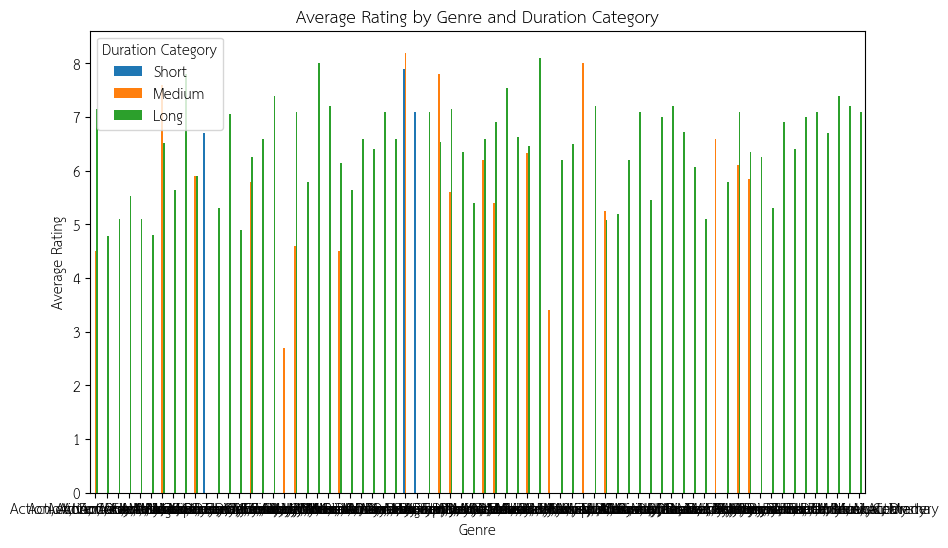

In [ ]:
# prompt: สร้าง bar chart เลือกเเค่ genre ที่เป็น drama action Romance Horror Musical

# Group data by Genre and Duration_Category, then calculate the average rating
genre_duration_rating = data_imdb.groupby(['Genre', 'Duration_Category'])['Rating'].mean().unstack()

# Create the bar chart
genre_duration_rating.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre and Duration Category')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Duration Category')
plt.show()


Text(0, 0.5, 'Number of Requests')

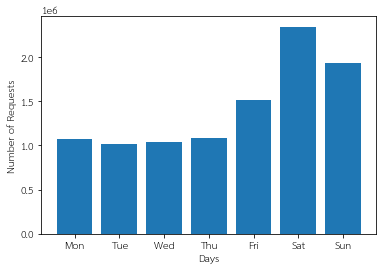

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

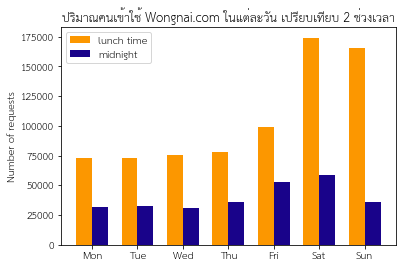

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

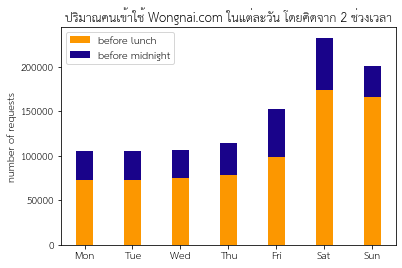

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

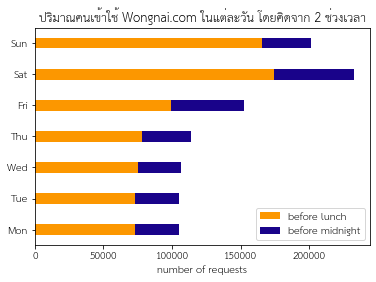

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

(array([8.25589208e-05, 8.25589208e-05, 8.25589208e-05, 1.65117842e-04,
        3.71515144e-04, 5.77912446e-04, 7.01750827e-04, 1.60989896e-03,
        1.94013464e-03, 2.43548816e-03, 3.71515144e-03, 5.94424230e-03,
        6.56343421e-03, 8.33845100e-03, 1.18884846e-02, 1.34158246e-02,
        1.60164306e-02, 1.77501680e-02, 2.09286864e-02, 2.21670702e-02,
        2.49327941e-02, 2.65014136e-02, 2.68316493e-02, 2.53868682e-02,
        2.43548816e-02, 2.25385854e-02, 2.20432319e-02, 2.09286864e-02,
        1.77088885e-02, 1.47367674e-02, 1.33332657e-02, 9.61811428e-03,
        8.09077424e-03, 7.05878773e-03, 4.66457903e-03, 3.01340061e-03,
        2.10525248e-03, 1.48606057e-03, 1.07326597e-03, 9.08148129e-04,
        2.06397302e-04, 1.23838381e-04, 8.25589208e-05, 8.25589208e-05,
        8.25589208e-05, 0.00000000e+00, 8.25589208e-05, 0.00000000e+00,
        0.00000000e+00, 4.12794604e-05]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.0190

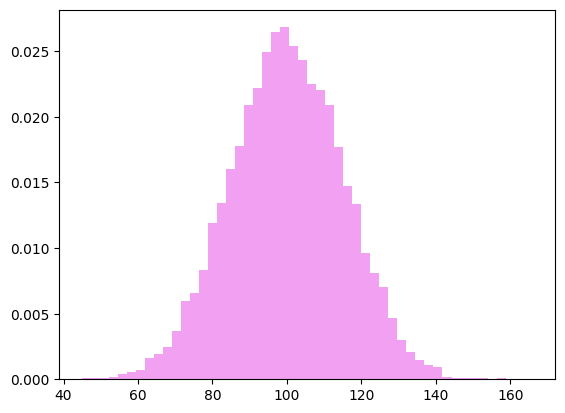

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = 'violet', alpha = 0.75)

##หนังอินเดีย

In [ ]:
# prompt: ทำให้ genre เป็น unique ที่ไม่ซ้ำกัน

unique_genres = []
for genre_list in data_imdb['Genre'].str.split(',').dropna():
  for genre in genre_list:
    genre = genre.strip()
    if genre not in unique_genres:
      unique_genres.append(genre)

print(unique_genres)


['Drama', 'Musical', 'Comedy', 'Romance', 'War', 'Documentary', 'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', 'Fantasy', 'Family', 'Biography', 'History', 'Sport', 'Adventure', 'Sci-Fi', 'Music', 'Animation', 'News', 'Western', 'Reality-TV', 'Short']


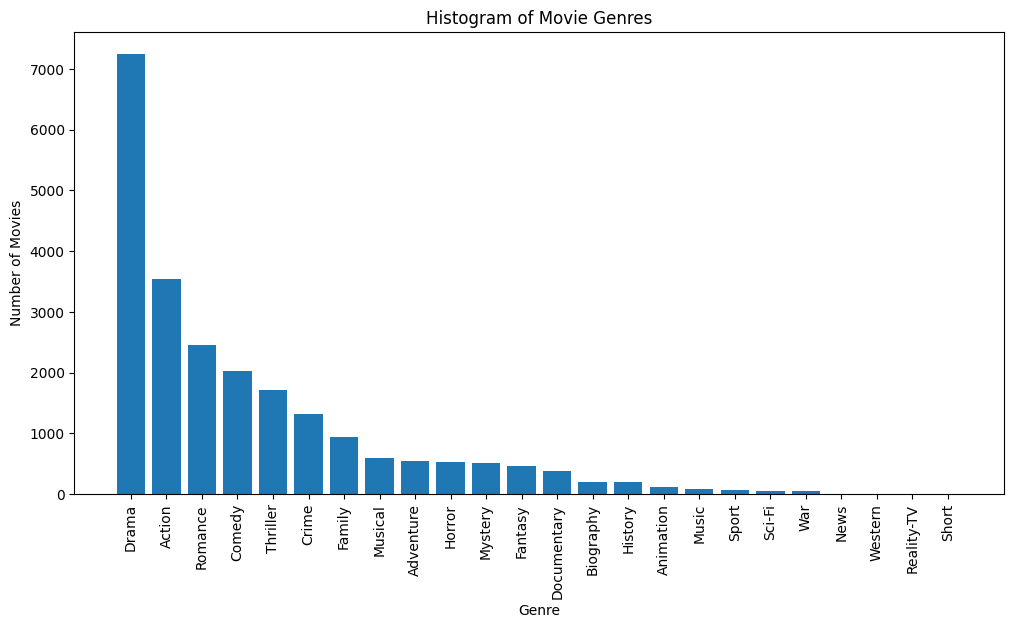

In [ ]:
# prompt: ทำ histogram ของ unique_genres โดยที่เเกน x มี genre ที่ไม่ซ้ำกัน โดยใช้ hist

genre_counts = data_imdb['Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Histogram of Movie Genres')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# prompt: Dropna actor 1 กับ 2

data_imdb = data_imdb.dropna(subset=['Actor 1', 'Actor 2'])


In [ ]:
# prompt: ใช้ histogram นับว่า Actor1 กับ Actor2 ใด เล่นหนังด้วยกันบ่อยที่สุด top 20

from collections import Counter

actor_pairs = []
for _, row in data_imdb.iterrows():
    actor1 = row['Actor 1']
    actor2 = row['Actor 2']
    actor_pairs.append(tuple(sorted((actor1, actor2))))

pair_counts = Counter(actor_pairs)
pairs = pair_counts.most_common(50)

print("Top 20 Actor Pairs:")
for pair, count in top_20_pairs:
    print(f"{pair}: {count}")


Top 20 Actor Pairs:
('Jeetendra', 'Rekha'): 21
('Dharmendra', 'Hema Malini'): 16
('Jaya Prada', 'Jeetendra'): 15
('Dara Singh', 'Mumtaz'): 13
('Fearless Nadia', 'John Cawas'): 13
('Ashok Kumar', 'Nalini Jaywant'): 12
('Hema Malini', 'Jeetendra'): 11
('Amit Pachori', 'Sapna Sappu'): 11
('Ajit', 'Nalini Jaywant'): 10
('Jeetendra', 'Reena Roy'): 10
('Nargis', 'Raj Kapoor'): 10
('Raj Babbar', 'Smita Patil'): 10
('Ashok Kumar', 'Meena Kumari'): 10
('Rajesh Khanna', 'Sharmila Tagore'): 10
('Sharmila Tagore', 'Shashi Kapoor'): 9
('Jeevan', 'Trilok Kapoor'): 9
('Chitra', 'Daljeet'): 9
('Hema Malini', 'Rajesh Khanna'): 9
('Reena Roy', 'Shatrughan Sinha'): 9
('Mithun Chakraborty', 'Ranjeeta Kaur'): 9
('Dharmendra', 'Jeetendra'): 9
('Ashok Kumar', 'Nirupa Roy'): 8
('Dev Anand', 'Madhubala'): 8
('Ashok Kumar', 'Devika Rani'): 8
('Govinda', 'Raveena Tandon'): 8
('Mahipal', 'Shakila'): 8
('Ashok Kumar', 'Mala Sinha'): 8
('Dinshaw Bilimoria', 'Ruby Mayer'): 8
('Rekha', 'Shashi Kapoor'): 8
('Govinda',

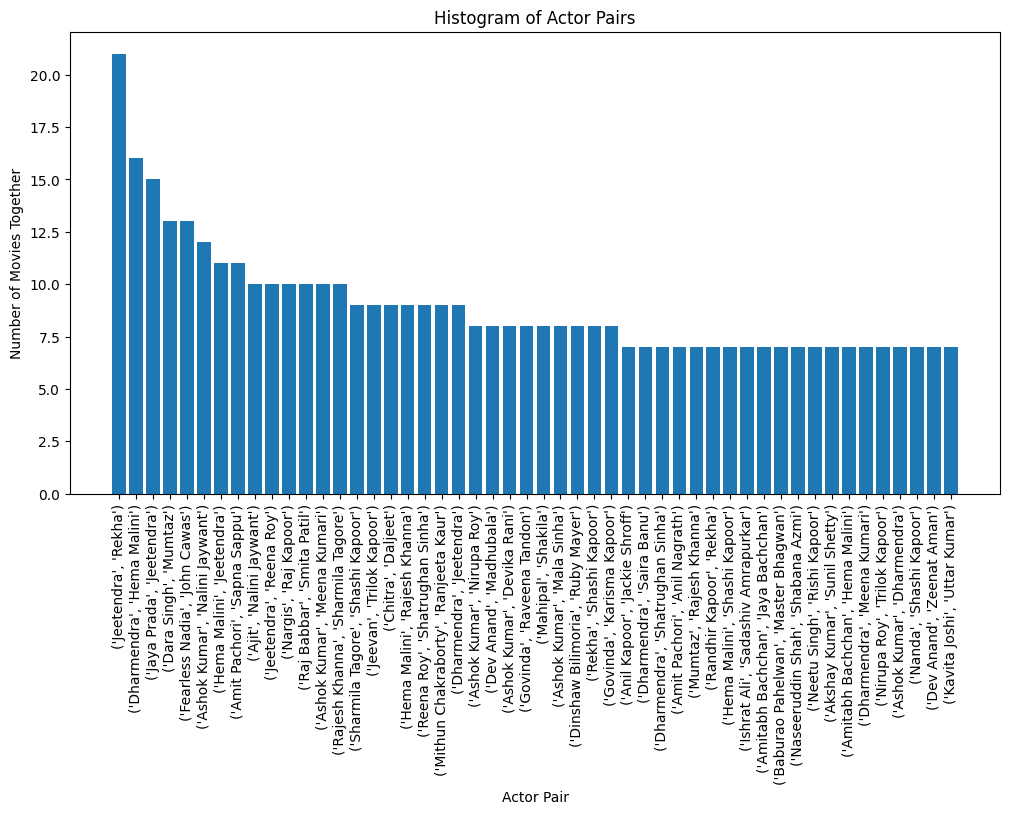

In [ ]:
actor_pair_counts = pd.DataFrame(pairs, columns=['actor_pairs', 'Count'])
plt.figure(figsize=(12, 6))
# Convert actor pairs to strings for plotting
actor_pair_labels = [str(pair) for pair in actor_pair_counts['actor_pairs']]
plt.bar(actor_pair_labels, actor_pair_counts['Count'])
plt.xlabel('Actor Pair')
plt.ylabel('Number of Movies Together')
plt.title('Histogram of Actor Pairs')
plt.xticks(rotation=90)
plt.show()

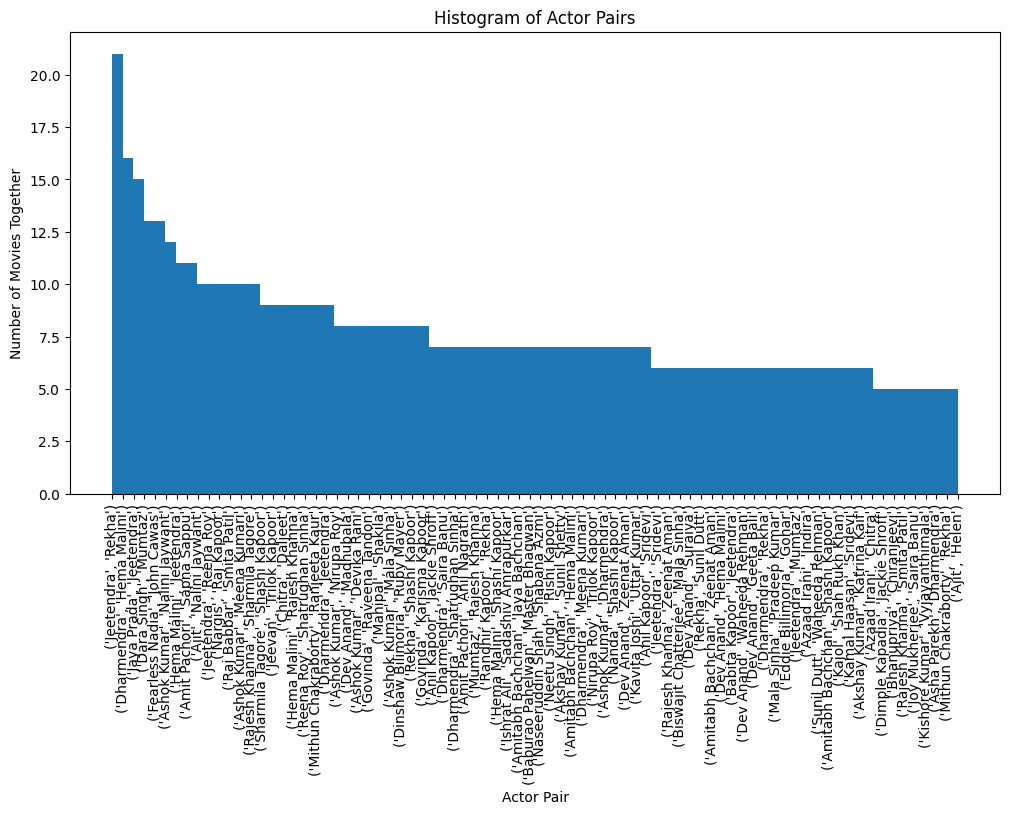

In [ ]:
# prompt: หา Actor1 กับ Actor2 ที่มักจะแสดงงหนังเรื่องเดียวกันด้วย histogram โดยใช้ plt.hist โดยให้ เเกน x เป็นชื่อ นักแสดง เเกน y เป็น จำนวนหนังที่เล่นด้วยกัน

actor_pairs = []
for _, row in data_imdb.iterrows():
    actor1 = row['Actor 1']
    actor2 = row['Actor 2']
    actor_pairs.append(tuple(sorted((actor1, actor2))))

pair_counts = Counter(actor_pairs)
top_20_pairs = pair_counts.most_common(80)

actor_pair_counts = pd.DataFrame(top_20_pairs, columns=['actor_pairs', 'Count'])
plt.figure(figsize=(12, 6))
# Convert actor pairs to strings for plotting
actor_pair_labels = [str(pair) for pair in actor_pair_counts['actor_pairs']]

plt.hist(actor_pair_labels, bins=len(actor_pair_labels), weights=actor_pair_counts['Count'])

plt.xlabel('Actor Pair')
plt.ylabel('Number of Movies Together')
plt.title('Histogram of Actor Pairs')
plt.xticks(rotation=90)
plt.show()


The most frequent actor pair is: ('Jeetendra', 'Rekha')

Top 10 most frequent actor pairs:
(Jeetendra, Rekha)                  21
(Dharmendra, Hema Malini)           16
(Jeetendra, Jaya Prada)             15
(Dara Singh, Mumtaz)                11
(Jeetendra, Hema Malini)            10
(Fearless Nadia, John Cawas)        10
(Ashok Kumar, Nalini Jaywant)       10
(Jeetendra, Reena Roy)              10
(Rajesh Khanna, Sharmila Tagore)    10
(Chitra, Daljeet)                    9
Name: count, dtype: int64


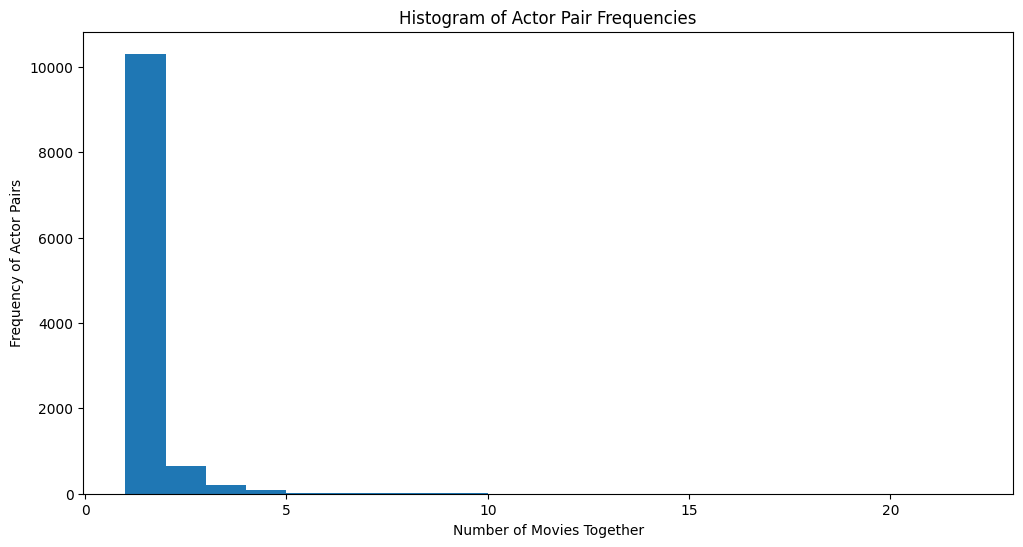

In [ ]:
# prompt: ใช้ histogram นับว่า Actor1 กับ Actor2 ใด เล่นหนังด้วยกันบ่อยที่สุด

# Combine Actor1 and Actor2 into a single list for each movie
actor_pairs = data_imdb.apply(lambda row: [(row['Actor 1'], row['Actor 2'])], axis=1).explode()

# Count the frequency of each actor pair
actor_pair_counts = actor_pairs.value_counts()

# Display the most frequent actor pair
print(f"The most frequent actor pair is: {actor_pair_counts.idxmax()}")

# You can also display the top N most frequent pairs
top_n = 10  # Change this to display a different number of pairs
print(f"\nTop {top_n} most frequent actor pairs:")
print(actor_pair_counts.head(top_n))

# Create a histogram of actor pair frequencies
plt.figure(figsize=(12, 6))
# Changed bins argument to use a suitable range for the data
plt.hist(actor_pair_counts.values, bins=range(1, actor_pair_counts.values.max()+2))
plt.xlabel('Number of Movies Together')
plt.ylabel('Frequency of Actor Pairs')
plt.title('Histogram of Actor Pair Frequencies')
plt.show()

ตัวอย่างข้อมูล wongnai.com

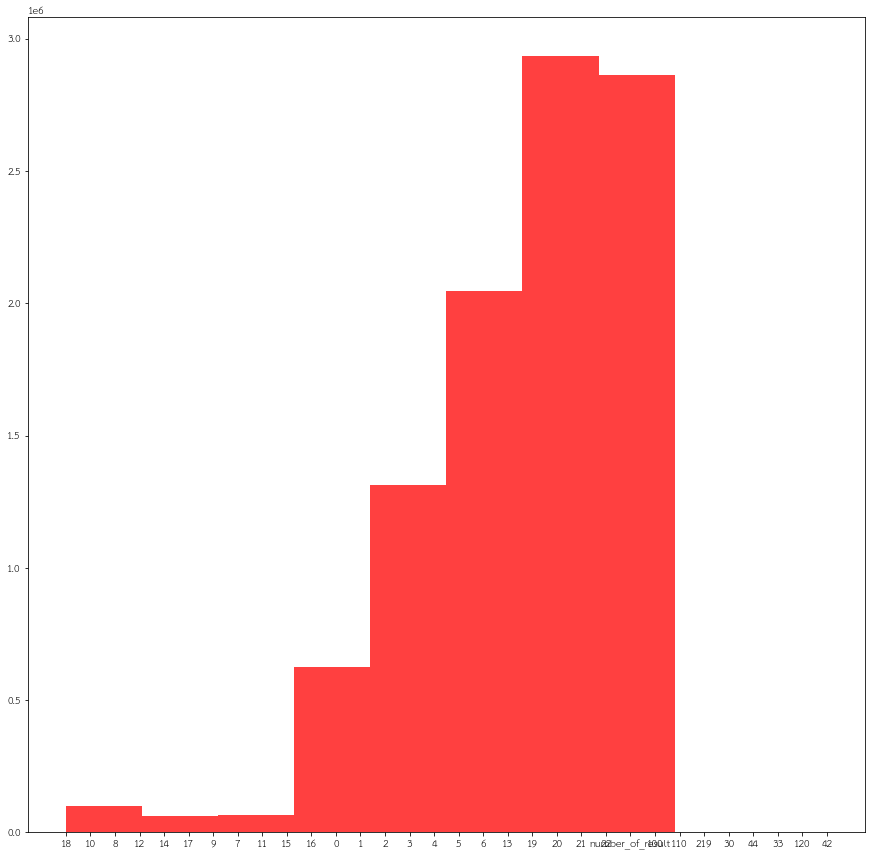

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
new_type = data['number_of_result'].astype('int32')

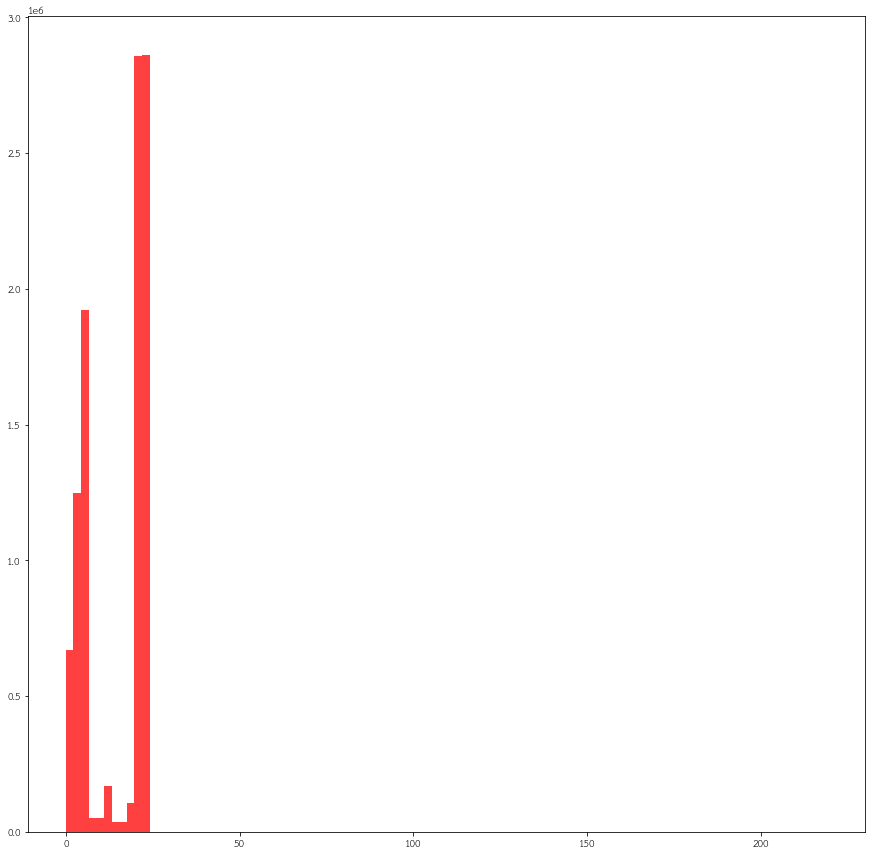

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

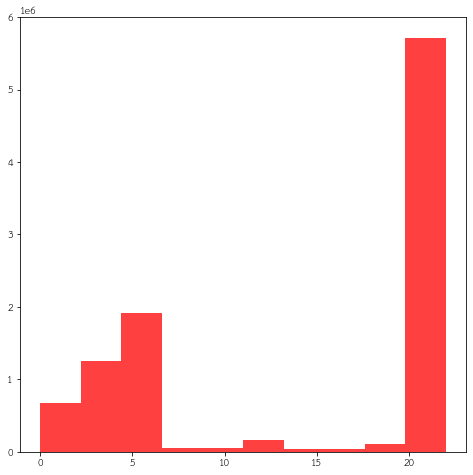

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [ ]:
output[0]

array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
         36883.,   35914.,  105490., 5717238.])

In [ ]:
output[0][-1]

5717238.0

In [ ]:
sum(output[0][:-1])

4287104.0

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

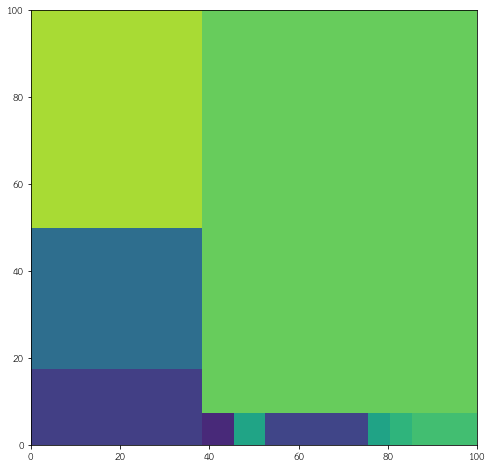

In [ ]:
squarify.plot(output[0])

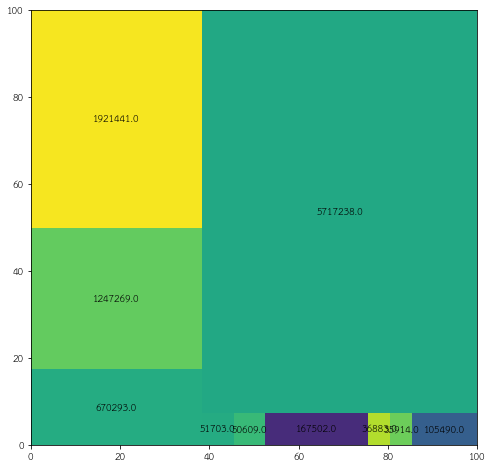

In [ ]:
squarify.plot(output[0],value=output[0])

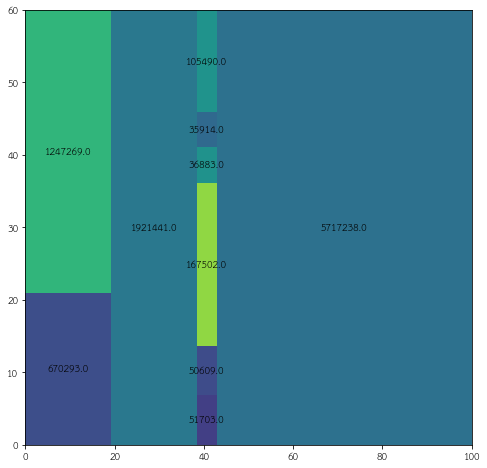

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

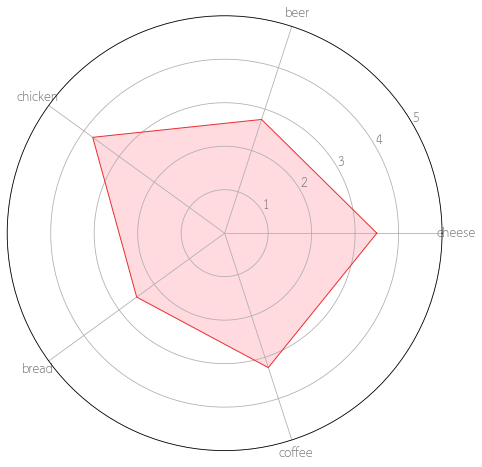

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

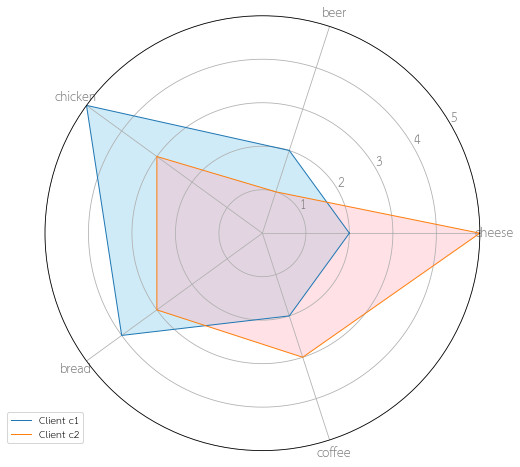

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))